In [1]:
!pip install essentia

     |████████████████████████████████| 11.7MB 2.9MB/s 


In [0]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,4)

[&larr; Back to Index](index.html)

# Mel Frequency Cepstral Coefficients (MFCCs)

The [mel frequency cepstral coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

Download an audio file:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Plot the audio signal:

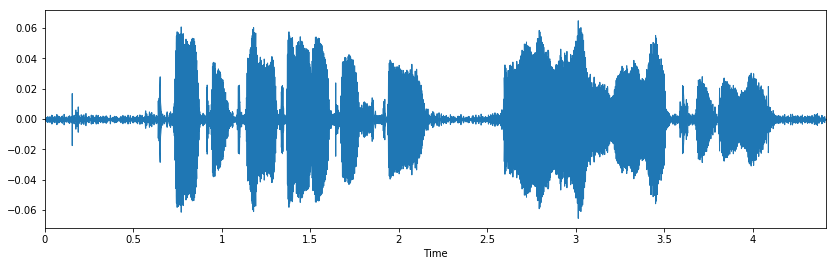

In [5]:
from librosa.display import waveplot
from librosa import load
x, fs = load('/content/drive/My Drive/PAS/Marina/MS-3.WAV')
waveplot(x, sr=fs)

Play the audio:

In [0]:
IPython.display.Audio(x, rate=fs)

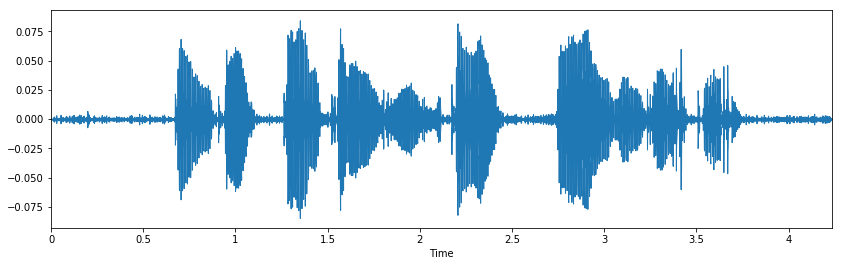

In [0]:
y, fp = load('/content/drive/My Drive/PAS/Sami/SM-3.WAV')
waveplot(y, sr=fp)

In [0]:
IPython.display.Audio(y, rate=fp)

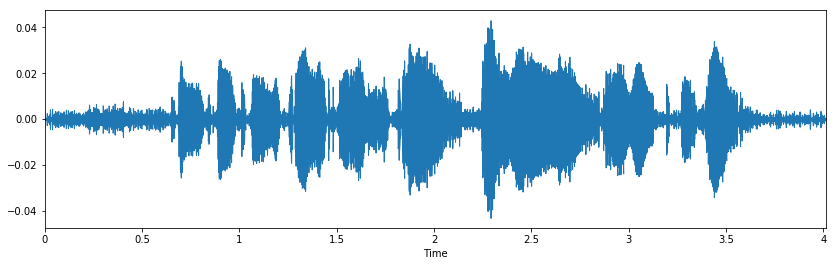

In [0]:
z, fq = load('/content/drive/My Drive/PAS/Maryam/SF-3.WAV')
waveplot(z, sr=fq)

In [0]:
IPython.display.Audio(z, rate=fq)

## `librosa.feature.mfcc`

[`librosa.feature.mfcc`](http://bmcfee.github.io/librosa/generated/librosa.feature.mfcc.html#librosa.feature.mfcc) computes MFCCs across an audio signal:


In [0]:
mfccs = librosa.feature.mfcc(x, sr=fs)
print mfccs.shape

(20, 191)


In [0]:
mfccs1 = librosa.feature.mfcc(y, sr=fp)
print mfccs1.shape

(20, 183)


In [0]:
mfccs2 = librosa.feature.mfcc(z, sr=fq)
print mfccs2.shape

(20, 173)


In this case, `mfcc` computed 20 MFCCs over 130 frames.

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification. For now, we will use the MFCCs as is.

Display the MFCCs:

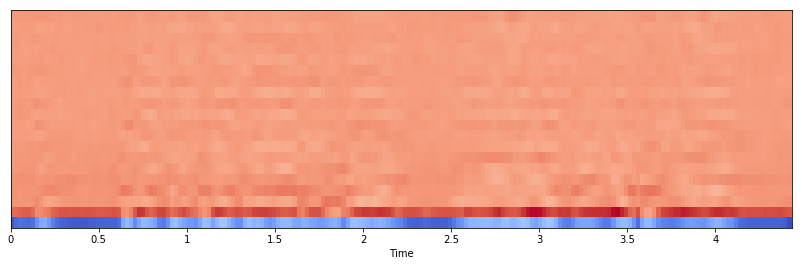

In [0]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

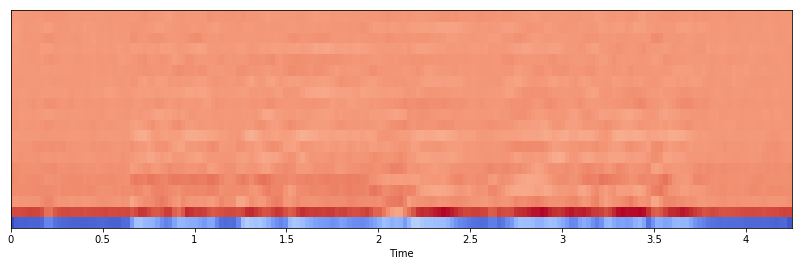

In [0]:
librosa.display.specshow(mfccs1, sr=fp, x_axis='time')

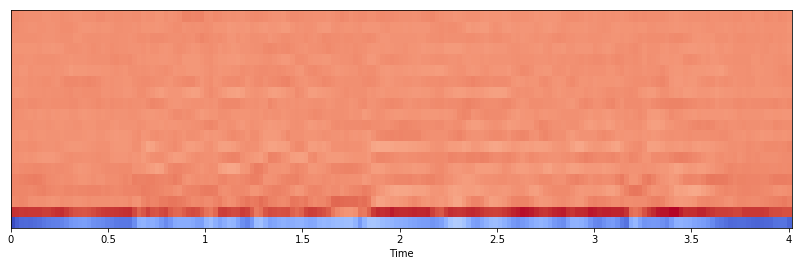

In [0]:
librosa.display.specshow(mfccs2, sr=fq, x_axis='time')

### Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [0]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print mfccs.mean(axis=1)
print mfccs.var(axis=1)

[ 9.09104089e-16  1.45593252e-15  1.39504464e-17 -6.80084261e-17
  9.82343933e-17 -8.54464841e-17 -2.89907714e-17 -2.42389006e-16
 -1.01722005e-17  1.86587220e-16  4.51064433e-16 -1.15672451e-16
 -7.67274551e-17 -1.98212592e-16  2.49945498e-17 -3.23766610e-16
  6.10332029e-17 -1.36016852e-16 -2.37738857e-16 -3.13885044e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
print(mfccs)

[[-0.50078923  0.5058933   0.26209075 ... -1.44846838 -1.41015558
  -1.67058187]
 [-0.31334427 -0.39315609 -0.21578577 ...  0.87138691  1.00163089
   1.03864822]
 [-0.50761186 -0.5109282  -0.32107008 ... -0.40182043 -0.47409674
  -0.25373056]
 ...
 [ 0.71959775  0.59224662  0.67502806 ... -0.08269822 -0.23601855
  -0.8361163 ]
 [ 0.12271822 -0.17473674 -0.11882981 ...  0.65177234  0.66720804
   0.76482839]
 [ 0.26044164  0.09145291  0.12875795 ... -1.51042033 -1.10772449
  -1.28948771]]


In [0]:
mfccs1 = sklearn.preprocessing.scale(mfccs1, axis=1)
print mfccs1.mean(axis=1)
print mfccs1.var(axis=1)

[ 1.22791880e-15 -5.44627337e-16 -2.13551095e-16  2.98637860e-16
 -2.39638303e-16  1.02528793e-16 -1.77757020e-16 -3.56376662e-17
  2.88172643e-16  1.74116944e-16 -5.21744154e-17 -4.61227899e-16
 -2.85139247e-16 -1.02528793e-16  1.88070567e-16  2.35012374e-16
  1.28616001e-16 -1.05562189e-16 -3.02277936e-16  6.67347173e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
mfccs2 = sklearn.preprocessing.scale(mfccs2, axis=1)
print mfccs2.mean(axis=1)
print mfccs2.var(axis=1)

[ 5.83220049e-15 -7.70096896e-17  4.54357168e-16 -1.64608211e-16
  1.52735884e-16 -1.18723271e-16 -1.11984924e-16 -2.97770800e-16
 -1.66533454e-16  2.69533913e-17 -2.07926162e-16 -3.91465922e-17
 -1.07171818e-16  1.23215503e-16  5.26232879e-17  2.91995073e-17
 -2.73384398e-16 -1.21932008e-17 -6.00033831e-16  1.24498998e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Display the scaled MFCCs:

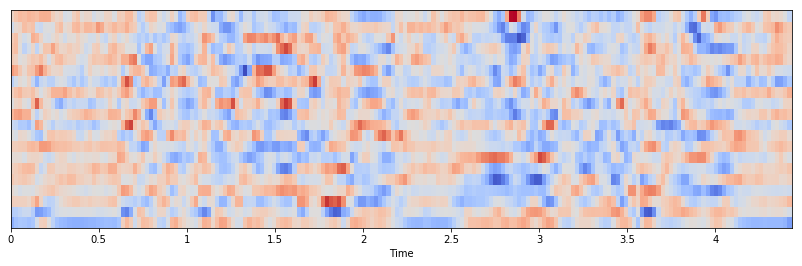

In [0]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

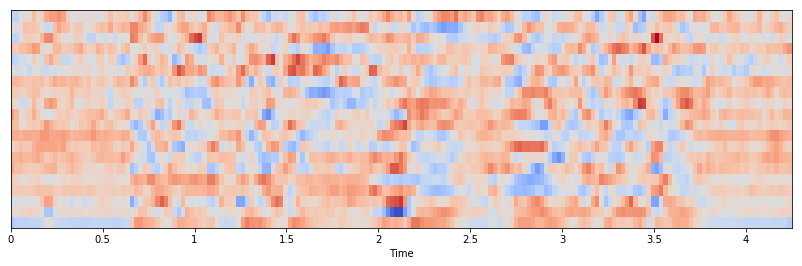

In [0]:
librosa.display.specshow(mfccs1, sr=fp, x_axis='time')

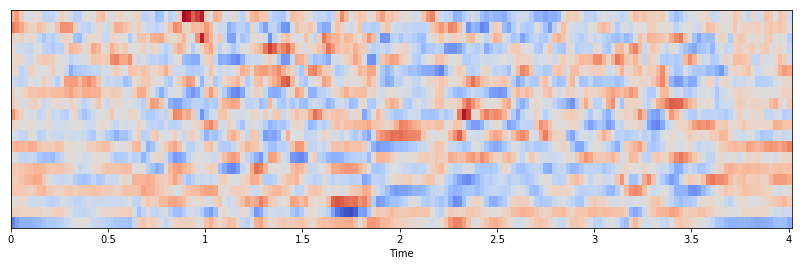

In [0]:
librosa.display.specshow(mfccs2, sr=fq, x_axis='time')

## `essentia.standard.MFCC`

We can also use [`essentia.standard.MFCC`](http://essentia.upf.edu/documentation/reference/std_MFCC.html) to compute MFCCs across a signal, and we will display them as a "MFCC-gram":

In [0]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

(196, 13)


In [0]:
mfccs1 = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(y, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs1.shape

(188, 13)


In [0]:
mfccs2 = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(z, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs2.shape

(179, 13)


Scale the MFCCs:

In [0]:
mfccs = sklearn.preprocessing.scale(mfccs)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [0]:
mfccs1 = sklearn.preprocessing.scale(mfccs1)    

In [0]:
mfccs2 = sklearn.preprocessing.scale(mfccs2)

Plot the MFCCs:

Text(0.5,0,'Frame Index')

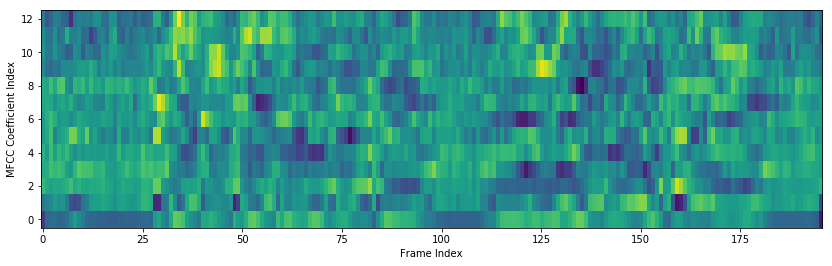

In [0]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

Text(0.5,0,'Frame Index')

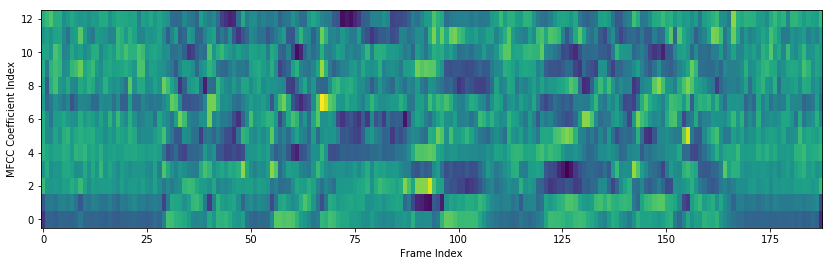

In [0]:
plt.imshow(mfccs1.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

Text(0.5,0,'Frame Index')

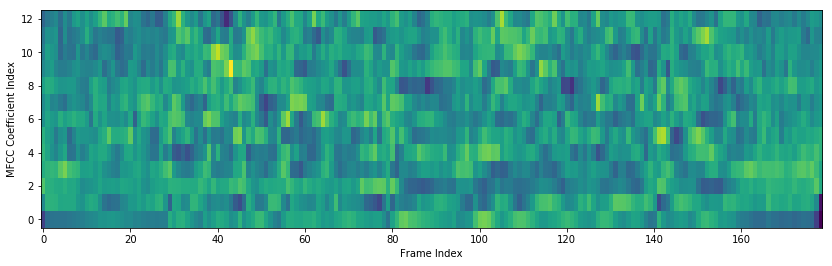

In [0]:
plt.imshow(mfccs2.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')

In [0]:
import math
# Example points in 3-dimensional space...
def dist(a,b):
  distance = math.sqrt(sum((a - b) **2))
  print("Euclidean distance from x to y: ",distance)
  return distance

In [0]:
dist(mfccs,mfccs1)

ValueError: ignored

[&larr; Back to Index](index.html)

In [0]:
from scipy.spatial import distance

print distance.cdist(mfccs, mfccs1, "euclidean")

[[2.62666551 3.86738165 3.63828493 ... 2.73238403 2.5370586  3.10662223]
 [4.28497115 4.74698433 4.88957777 ... 3.4591641  3.40743861 4.75883951]
 [4.31220315 5.0259451  5.0933961  ... 3.56556645 3.50114973 4.88852418]
 ...
 [4.14250525 4.1029339  4.12053608 ... 2.53502751 2.87667632 4.35103464]
 [3.86632957 3.58565714 3.44882482 ... 2.32235174 2.69971009 4.00891176]
 [4.09857431 4.996743   5.05962599 ... 4.22582394 4.31922325 4.10699676]]


In [0]:
print distance.cdist(mfccs, mfccs2, "euclidean")

[[2.51326806 2.11192403 2.76187727 ... 2.8262217  2.06455569 4.33027873]
 [2.7181195  2.28609368 2.87838546 ... 3.33449099 3.32600419 5.450798  ]
 [3.23119294 2.69217987 3.43923066 ... 3.24955136 3.43352542 5.76899736]
 ...
 [2.73977403 1.63627972 2.17426495 ... 2.40182632 2.9556048  6.0238486 ]
 [3.09323749 1.76539365 1.83268538 ... 2.17725285 2.87639975 5.82323338]
 [2.21490208 4.02609023 4.21443431 ... 4.17239864 2.77993014 3.2502349 ]]


In [0]:
print distance.cdist(mfccs1, mfccs2, "euclidean")

[[4.38861568 3.85821766 4.21361932 ... 4.10844447 3.11119422 4.27014599]
 [4.93125988 4.04860061 3.82991058 ... 3.27688742 3.68483673 5.91231841]
 [5.06471787 3.90893368 3.52789445 ... 3.5657362  4.0237925  5.8582818 ]
 ...
 [3.92230789 2.66716498 2.57535745 ... 2.3589252  2.94110319 5.54758219]
 [4.31492593 2.56374983 2.98907243 ... 3.44968567 3.35470251 5.6736853 ]
 [4.21095274 4.34807897 4.37347834 ... 3.7092348  2.77067785 3.99111279]]


(20, 205)
[ 1.01815575e-15 -8.75857652e-16 -5.41572207e-18 -6.61259665e-16
 -1.29977330e-17 -5.52403651e-17  1.76552540e-16 -5.95729428e-17
 -9.47751362e-18  9.74829973e-18 -1.48390785e-16  1.66499605e-16
 -9.85661417e-17 -5.95729428e-18 -4.87414986e-18 -1.05065008e-16
  1.32346708e-17  2.11213161e-17  1.03440292e-16  2.62662520e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


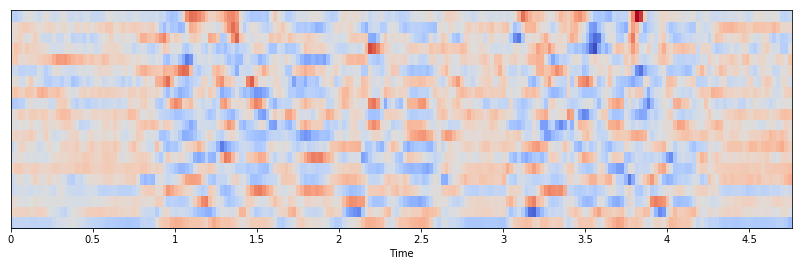

In [0]:
from librosa.display import waveplot
from librosa import load
x, fs = load('/content/drive/My Drive/PAS/Marina/MS-10.WAV')
waveplot(x, sr=fs)

IPython.display.Audio(x, rate=fs)

mfccs = librosa.feature.mfcc(x, sr=fs)
print mfccs.shape

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print mfccs.mean(axis=1)
print mfccs.var(axis=1)

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

(20, 219)
[-3.11369398e-15 -2.15454240e-15  6.84384056e-17 -5.25708345e-16
  2.74767525e-16 -1.80474610e-16  2.53475576e-18 -4.01758789e-17
 -2.78823134e-17  5.42437733e-17  1.77432903e-17  1.27181370e-16
 -5.00234050e-16  4.66395061e-17  4.88574174e-17 -1.46508883e-16
 -8.09094040e-16 -4.58790793e-17 -5.06951153e-17 -1.52085346e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


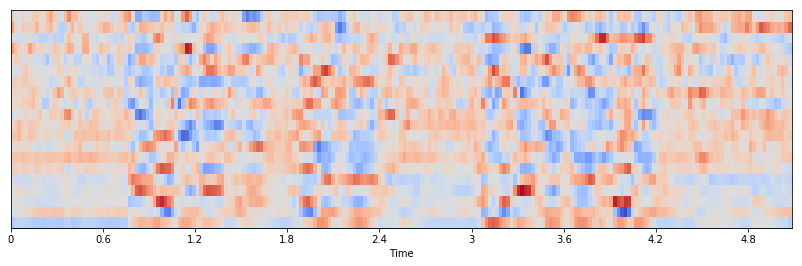

In [0]:
from librosa.display import waveplot
from librosa import load
x, fs = load('/content/drive/My Drive/PAS/Sami/SM-10.WAV')
waveplot(x, sr=fs)

IPython.display.Audio(x, rate=fs)

mfccs = librosa.feature.mfcc(x, sr=fs)
print mfccs.shape

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print mfccs.mean(axis=1)
print mfccs.var(axis=1)

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

NameError: ignored

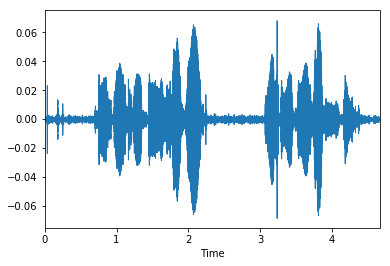

In [0]:
from librosa.display import waveplot
from librosa import load
x, fs = load('/content/drive/My Drive/PAS/Maryam/SF-10.WAV')
waveplot(x, sr=fs)

IPython.display.Audio(x, rate=fs)

mfccs = librosa.feature.mfcc(x, sr=fs)
print mfccs.shape

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print mfccs.mean(axis=1)
print mfccs.var(axis=1)

librosa.display.specshow(mfccs, sr=fs, x_axis='time')

**PCA**

In [0]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 5)


In [0]:
!pip install librosa
import librosa

(20, 201)
(201, 2)
[[ 0.11368605  0.69486518 -0.59723495 -0.00667493  0.05460098 -0.23962409
   0.08590341 -0.21159335  0.14748954  0.0176041   0.00341932  0.0600391
  -0.0180031   0.03841093 -0.00753164 -0.0301381  -0.03502999  0.01394288
  -0.01425316 -0.06987815]
 [ 0.12666491 -0.14430523  0.17710715  0.63733559  0.00192794 -0.54524704
   0.07721144 -0.27177312 -0.07579328 -0.09373461 -0.09356569  0.12365432
  -0.14524071  0.18202231  0.02223367 -0.03339487  0.05370772  0.10119662
  -0.18399959  0.08399248]]
(2, 20)


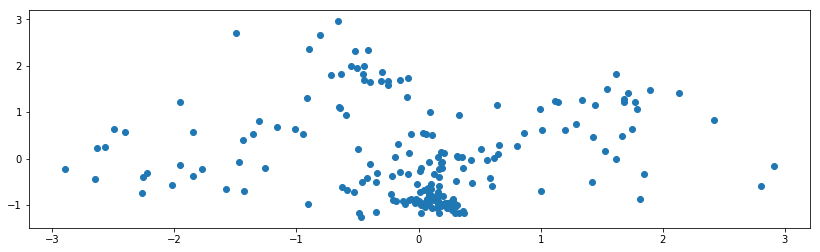

In [0]:
x, fs = librosa.load('/content/drive/My Drive/PAS/Maryam/SF-10.WAV')
IPython.display.Audio(x, rate=fs)

X = librosa.feature.mfcc(x, sr=fs)
print X.shape
X = sklearn.preprocessing.scale(X)
X.mean()
model = sklearn.decomposition.PCA(n_components=2, whiten=True)
model.fit(X.T)
Y1 = model.transform(X.T)
print Y1.shape

a=model.components_
print(a)
print(a.shape)

plt.scatter(Y1[:,0], Y1[:,1])

In [0]:
print(Y[:,0])

In [0]:
print(Y[:,1])

(20, 205)
(205, 2)
(2, 20)


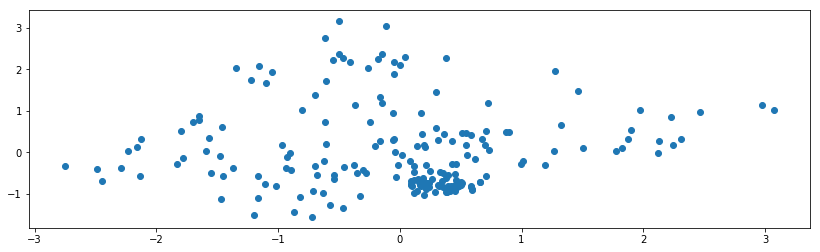

In [0]:
x, fs = librosa.load('/content/drive/My Drive/PAS/Marina/MS-10.WAV')
IPython.display.Audio(x, rate=fs)

X = librosa.feature.mfcc(x, sr=fs)
print X.shape
X = sklearn.preprocessing.scale(X)
X.mean()
model = sklearn.decomposition.PCA(n_components=2, whiten=True)
model.fit(X.T)
Y2 = model.transform(X.T)
print Y2.shape

b=model.components_
model.components_.shape
print(model.components_.shape)

plt.scatter(Y2[:,0], Y2[:,1])

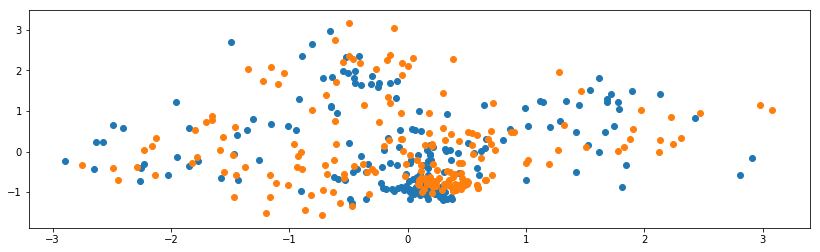

In [0]:
plt.scatter(Y1[:,0],Y1[:,1])
plt.scatter(Y2[:,0],Y2[:,1])


In [0]:
#print(a)
#print(b)

c=a-b
print(c)
print(c.shape)

[[ 2.97082231e-01  1.34770252e+00 -1.12227804e+00  1.55361256e-01
   5.77079138e-02 -6.35031815e-01  1.93108597e-01 -3.65974188e-01
   2.03597379e-01  1.01744668e-01 -7.85337471e-02  1.49436205e-01
  -1.04766137e-01  8.36392531e-02 -3.77628894e-03 -9.77379143e-02
   4.01337004e-04 -4.36873266e-03 -8.85447100e-02 -8.87697924e-02]
 [ 5.40764302e-02  2.03737020e-01  5.39422573e-02 -1.29361161e-01
   1.10325852e-01 -2.70481470e-01  1.19863728e-02 -2.42516664e-01
   1.62920164e-01 -4.30574205e-02 -1.31603368e-02  1.04250654e-03
   1.71256753e-02  1.52962115e-01 -1.32654125e-01  1.04857309e-01
  -5.29163164e-02  2.12896460e-02 -8.85995790e-02  7.84817241e-02]]
(2, 20)


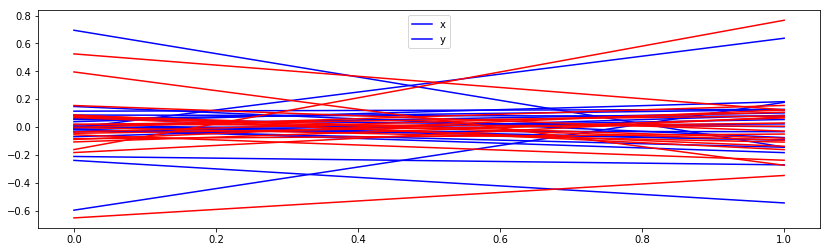

In [0]:
plt.plot(a, c='b')
plt.plot(b, c='r')
plt.legend(('x', 'y'))